# Práctica Perceptrón Multicapa

El objetivo de esta práctica es realizar una implementación del perceptrón multicapa con *una sola* capa oculta y utilizarla para experimentar con los problemas dados.

Como parte de la arquitectura del modelo de red neuronal a utilizar en cada problema se debe tener en cuenta la cantidad de unidades en la capa oculta y los tipos de funciones de activación.

Se recomienda tener algún tipo de medida de desempeño del modelo durante el entrenamiento.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
P = 100  # Numero de muestras
Si = 2  # Numero de unidades de entradas
Sh = 3  # Numero de unidades ocultas
So = 1  # Numero de unidades de salida

In [3]:
x = np.random.uniform(-1, 1, (P, Si))  # Matriz de 100x2
z = np.where(np.prod(x, axis=1) > 0, 1, -1).reshape((P, So))  # Matriz de 100x1

print(x[0])
print(z[0])

print(x[1])
print(z[1])

[-0.22679566 -0.52436177]
[1]
[-0.58810138 -0.00391137]
[1]


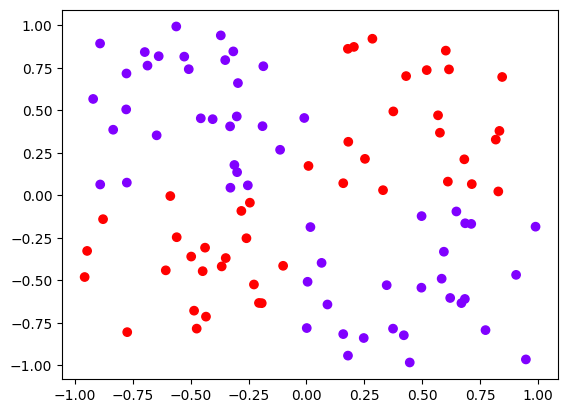

In [4]:
plt.scatter(x[:, 0], x[:, 1], c=z.flatten(), cmap='rainbow')
plt.show()

In [5]:
# Agrega una columna de unos al final de la matriz
def bias_add(V):
    bias = np.ones((len(V), 1))
    return np.hstack([V, bias])


# Elimina la última columna de la matriz
def bias_sub(V):
    return V[:, :-1]

In [6]:
# Inicializamos las capas de la red
Y0 = np.zeros((P, Si + 1))
Y1 = np.zeros((P, Sh + 1))
Y2 = np.zeros((P, So))

In [7]:
# Inicializamos los pesos de la red
W1 = np.random.normal(0, 0.1, (Si + 1, Sh))
W2 = np.random.normal(0, 0.1, (Sh + 1, So))

In [8]:
lr = 0.01  # Coeficiente de aprendizaje
E = []  # Historial de errores
error = 1.0  # Error inicial
epoch = 0  # Contador de épocas

while (error > 0.1) and (epoch < 999):
    Y0[:] = bias_add(x)  # Agregar bias a la capa de entrada, que son los datos y el bias
    Y1[:] = bias_add(np.tanh(np.dot(Y0,
                                    W1)))  # La capa oculta es la tangente hiperbólica de la suma ponderada de la capa de entrada. Agregar el bias
    Y2[:] = np.tanh(np.dot(Y1, W2))  # Capa de salida

    E2 = z - Y2  # Error en la capa de salida
    dY2 = 1 - np.square(Y2)  # Derivada de la función de activación
    D2 = E2 * dY2  # Delta de la capa de salida
    dW2 = np.dot(Y1.T, D2)  # Gradiente de la capa de salida

    E1 = np.dot(D2, W2.T)  # Error en la capa oculta
    dY1 = 1 - np.square(Y1)  # Derivada de la función de activación
    D1 = bias_sub(E1 * dY1)  # Delta de la capa oculta
    dW1 = np.dot(Y0.T, D1)  # Gradiente de la capa oculta

    W1 += lr * dW1  # Actualizar pesos de la capa oculta
    W2 += lr * dW2  # Actualizar pesos de la capa de salida

    error = np.mean(np.square(E2))  # Calcular error cuadrático medio

    E.append(error)  # Guardar historial de errores

    epoch += 1
    if epoch % 100 == 0:
        print(epoch, error)



100 0.9734056421363253
200 0.4701312716824958
300 0.27367595667867417
400 0.1606336896706609
500 0.179144132115324
600 0.16334434285271293
700 0.15494353823282103
800 0.14916496476863011
900 0.1446429651323787


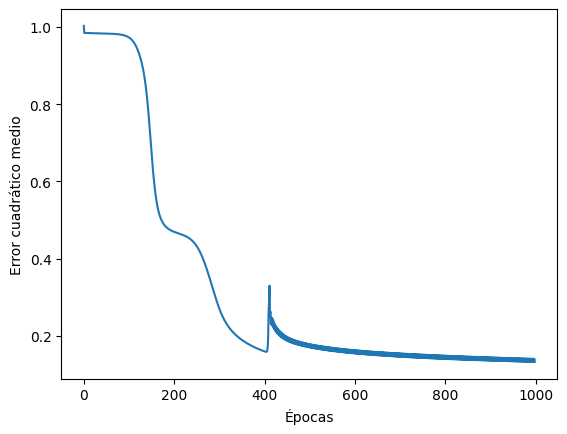

In [9]:
# Visualizar el historial de errores
plt.plot(E)
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.show()

### Entrenamiento estocástico

In [10]:
# Inicializamos las capas de la red
Y0 = np.zeros((P, Si + 1))
Y1 = np.zeros((P, Sh + 1))
Y2 = np.zeros((P, So))

# Inicializamos los pesos de la red
W1 = np.random.normal(0, 0.1, (Si + 1, Sh))
W2 = np.random.normal(0, 0.1, (Sh + 1, So))

In [11]:
lr = 0.01  # Coeficiente de aprendizaje
E = []  # Historial de errores
error = 1.0  # Error inicial
epoch = 0  # Contador de épocas
error_total = 0.0  # Error total acumulado

while (error > 0.01) and (epoch < 999):
    stochastic = np.random.permutation(P)  # Orden aleatorio de los datos
    error_total = 0.0  # Error total acumulado

    for i in stochastic:
        # Paso hacia adelante
        Y0 = bias_add(x[i].reshape(1, -1))  # Agregar bias a la muestra actual
        Y1 = bias_add(np.tanh(np.dot(Y0, W1)))  # Activación tangente hiperbólica en la capa oculta
        Y2 = np.tanh(np.dot(Y1, W2))  # Capa de salida

        # Paso hacia atrás (retropropagación)
        E2 = z[i] - Y2  # Error en la capa de salida
        dY2 = 1 - np.square(Y2)  # Derivada de la función de activación
        D2 = E2 * dY2  # Delta de la capa de salida
        dW2 = np.dot(Y1.T, D2)  # Gradiente de la capa de salida

        E1 = np.dot(D2, W2.T)  # Error en la capa oculta
        dY1 = 1 - np.square(Y1)  # Derivada de la tangente hiperbólica
        D1 = bias_sub(E1 * dY1)  # Delta de la capa oculta
        dW1 = np.dot(Y0.T, D1)  # Gradiente de la capa oculta

        # Actualizar los pesos para la muestra actual
        W1 += lr * dW1  # Actualizar pesos de la capa oculta
        W2 += lr * dW2  # Actualizar pesos de la capa de salida

        # Acumular el error total para esta época
        error_total += np.mean(np.square(E2))

    # Calcular el error medio cuadrático para la época
    error = error_total / P

    E.append(error)  # Guardar historial de errores

    epoch += 1
    if epoch % 100 == 0:
        print(epoch, error)


100 0.9821824772782969
200 0.25000237402570996
300 0.1457186442232659
400 0.12719751255487632
500 0.11802063578194312
600 0.11365696845708906
700 0.11085710899067179
800 0.10814169050215038
900 0.1052066334159999


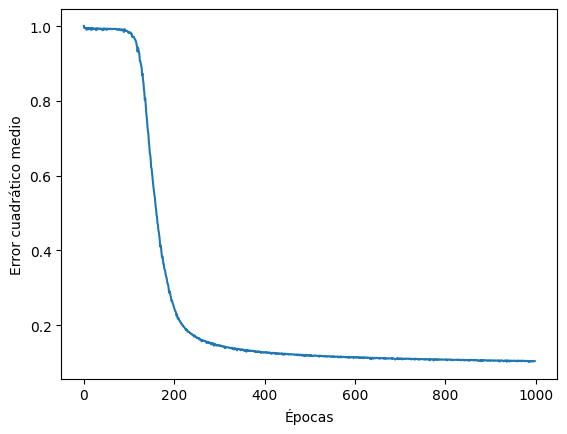

In [12]:
# Visualizar el historial de errores
plt.plot(E)
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.show()

### Entrenamiento en mini-lotes

In [13]:
# Inicializamos las capas de la red
Y0 = np.zeros((P, Si + 1))
Y1 = np.zeros((P, Sh + 1))
Y2 = np.zeros((P, So))

# Inicializamos los pesos de la red
W1 = np.random.normal(0, 0.1, (Si + 1, Sh))
W2 = np.random.normal(0, 0.1, (Sh + 1, So))

Epoch 100, Error: 0.9860036265464983
Epoch 200, Error: 0.9857625204865912
Epoch 300, Error: 0.9845851108335176
Epoch 400, Error: 0.9842471921302923
Epoch 500, Error: 0.9849118543289112
Epoch 600, Error: 0.9839768827326156
Epoch 700, Error: 0.9838277514528282
Epoch 800, Error: 0.9832408987238174
Epoch 900, Error: 0.98371740914749
Epoch 1000, Error: 0.9828393125665396
Epoch 1100, Error: 0.9814907400746911
Epoch 1200, Error: 0.9782159554743428
Epoch 1300, Error: 0.9704510835196788
Epoch 1400, Error: 0.9516537858022746
Epoch 1500, Error: 0.9051625141269366
Epoch 1600, Error: 0.7899101113499799
Epoch 1700, Error: 0.6026211556400171
Epoch 1800, Error: 0.4865542046009631
Epoch 1900, Error: 0.441353478559617
Epoch 2000, Error: 0.42290921584162916


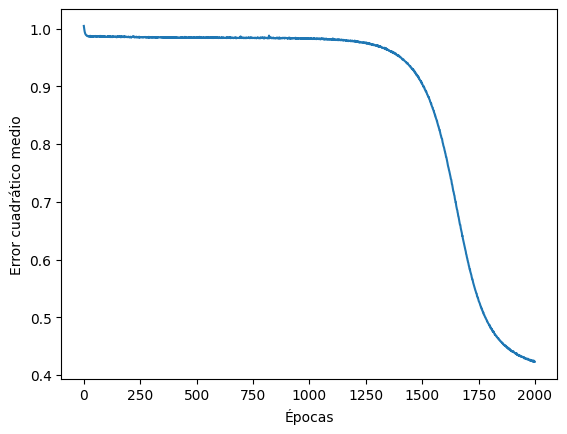

In [14]:
lr = 0.01  # Coeficiente de aprendizaje
batch_size = 10  # Tamaño del mini-batch
E = []  # Historial de errores
error = 1.0  # Error inicial
epoch = 0  # Contador de épocas
error_total = 0.0  # Error total acumulado

while (error > 0.01) and (epoch < 2000):
    stochastic = np.random.permutation(P)  # Orden aleatorio de los datos
    error_total = 0.0  # Reiniciar el error total acumulado para la época

    # Dividir los datos en mini-batches
    for start in range(0, P, batch_size):
        end = start + batch_size
        batch_indices = stochastic[start:end]  # Índices del mini-batch
        batch_x = x[batch_indices]  # Datos de entrada del mini-batch
        batch_z = z[batch_indices]  # Etiquetas del mini-batch

        dW1_total = np.zeros_like(W1)  # Inicializar gradiente acumulado de W1
        dW2_total = np.zeros_like(W2)  # Inicializar gradiente acumulado de W2

        # Para cada muestra en el mini-batch
        for i in range(len(batch_indices)):
            # Paso hacia adelante
            Y0 = bias_add(batch_x[i].reshape(1, -1))  # Agregar bias a la muestra actual
            Y1 = bias_add(np.tanh(np.dot(Y0, W1)))  # Activación tangente hiperbólica en la capa oculta
            Y2 = np.tanh(np.dot(Y1, W2))  # Activación tangente hiperbólica en la capa de salida

            # Paso hacia atrás (retropropagación)
            E2 = batch_z[i] - Y2  # Error en la capa de salida
            dY2 = 1 - np.square(Y2)  # Derivada de la función tangente hiperbólica
            D2 = E2 * dY2  # Delta de la capa de salida
            dW2 = np.dot(Y1.T, D2)  # Gradiente de la capa de salida

            E1 = np.dot(D2, W2.T)  # Error en la capa oculta
            dY1 = 1 - np.square(Y1)  # Derivada de la tangente hiperbólica
            D1 = bias_sub(E1 * dY1)  # Delta de la capa oculta
            dW1 = np.dot(Y0.T, D1)  # Gradiente de la capa oculta

            # Acumular gradientes para el mini-batch
            dW1_total += dW1
            dW2_total += dW2

            # Acumular el error total para esta muestra
            error_total += np.mean(np.square(E2))

        # Actualizar los pesos usando la media de los gradientes del mini-batch
        W1 += lr * dW1_total / batch_size
        W2 += lr * dW2_total / batch_size

    # Calcular el error medio cuadrático para la época
    error = error_total / P

    E.append(error)  # Guardar historial de errores

    epoch += 1
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Error: {error}')

# Visualizar el historial de errores
plt.plot(E)
plt.xlabel('Épocas')
plt.ylabel('Error cuadrático medio')
plt.show()


## Paridad

El problema de XOR puede ser considerador como equivalente al problema de paridad para dos variables, es decir, el resultado es 1 solo cuando la cantidad de unos en la entrada es impar.

Implementar un perceptrón multicapa que pueda aprender el problema de paridad para distinta cantidad de variables de entrada.

Entrenarlo para 2, 3, 4, 5 y 6 variables de entrada probando las siguientes estrategias.

- Variando la cantidad de unidades por capa.
- Con distintos valores para el coeficiente de aprendizaje.

In [16]:
def generate_parity_data(n):
    X = np.array([list(map(int, bin(i)[2:].zfill(n))) for i in range(2 ** n)])
    Z = np.sum(X, axis=1) % 2
    Z = Z.reshape(-1, 1)
    return X, Z


# Ejemplo para 2 variables de entrada
X, Z = generate_parity_data(2)
print(X)
print(Z)


[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[[0]
 [1]
 [1]
 [0]]


In [17]:
# Función de bias para agregar la unidad umbral
def bias_add(V):
    bias = np.ones((len(V), 1))
    return np.hstack([V, bias])


# Función para remover el bias en los deltas
def bias_sub(x):
    return x[:, :-1]


# Función de activación usando sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


# Derivada función activación sigmoid
def sigmoid_derivada(x):
    return x * (1 - x)


# Función de activación usando tanh
def tanh(x):
    return np.tanh(x)


# Derivada de la función de activación tanh
def tanh_derivada(x):
    return 1 - np.square(np.tanh(x))


In [18]:
def train_parity_model(n, Sh, lr, epochs=10000):
    '''
    Entrena un modelo de red neuronal para el problema de paridad con n variables de entrada.
    :param n: Numero de columnas de la matriz de datos 
    :param Sh: Número de unidades en la capa oculta
    :param lr: Learning Rate
    :param epochs: Cantidad de épocas
    :return: Devuelve el historial de errores
    '''
    # Generar los datos
    X, Z = generate_parity_data(n)

    # Parámetros de la red
    Si = X.shape[1]  # Unidades en la capa de entrada
    So = 1  # Unidades en la capa de salida

    # Inicialización de pesos
    W1 = np.random.normal(0, 0.5, size=(Si + 1, Sh))
    W2 = np.random.normal(0, 0.5, size=(Sh + 1, So))

    E = []
    e = 1
    t = 0

    while (e > 0.01) and (t < epochs):
        # Forward pass
        Y0 = bias_add(X)  # Agregamos una unidad de bias
        Y1 = sigmoid(np.dot(Y0, W1))  # Capa oculta, activacion sigmoideal
        Y1 = bias_add(Y1)  # Agregamos una unidad de bias
        Y2 = sigmoid(np.dot(Y1, W2))  # Capa de salida, activacion sigmoideal

        # Backpropagation

        # Error en capa de salida
        E2 = Z - Y2
        D2 = E2 * sigmoid_derivada(Y2)
        dW2 = np.dot(Y1.T, D2)

        # Error en capa oculta
        E1 = np.dot(D2, W2.T)
        D1 = bias_sub(E1 * sigmoid_derivada(Y1))
        dW1 = np.dot(Y0.T, D1)

        # Actualización de pesos
        W1 += lr * dW1
        W2 += lr * dW2

        # Calcular error medio cuadrático
        e = np.mean(np.square(E2))
        E.append(e)  # Guardar historial de error

        t += 1

    return E

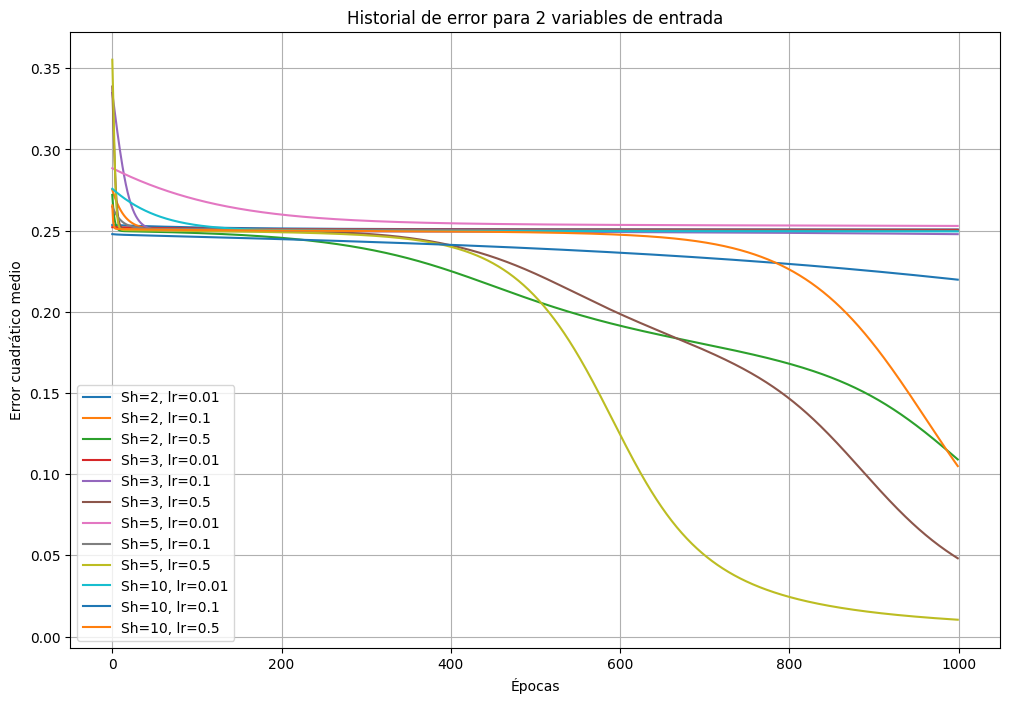

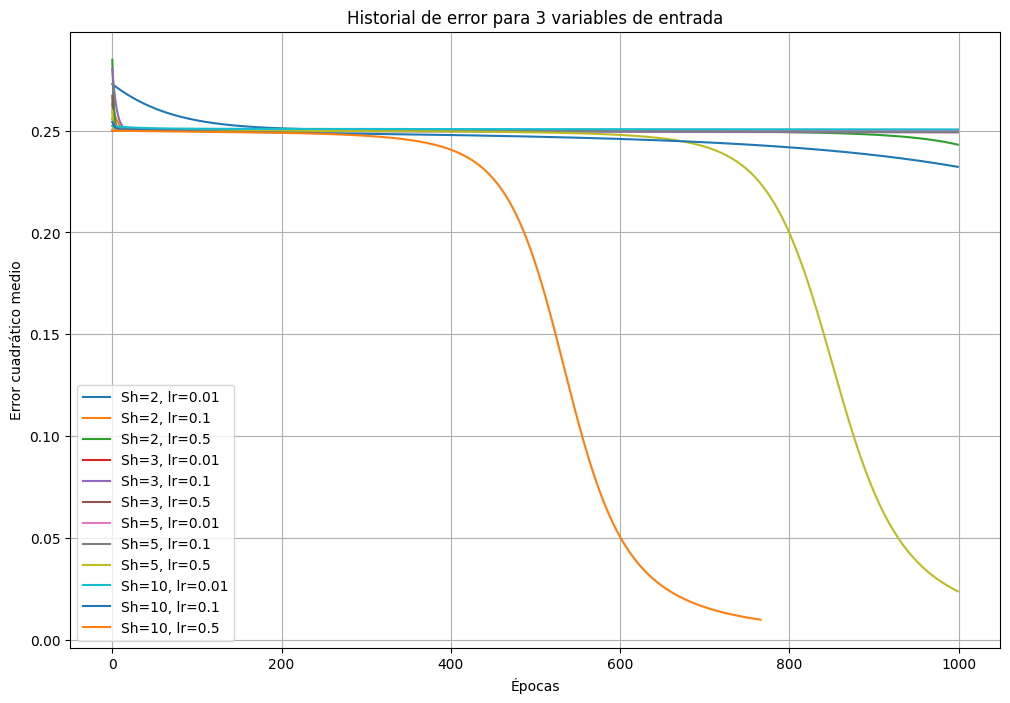

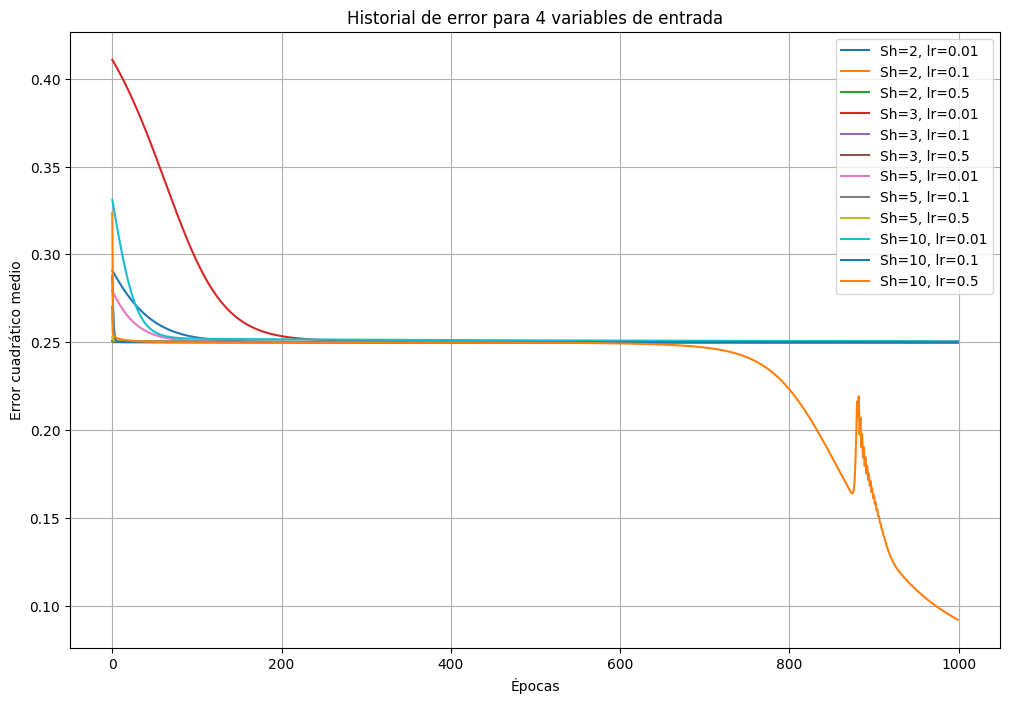

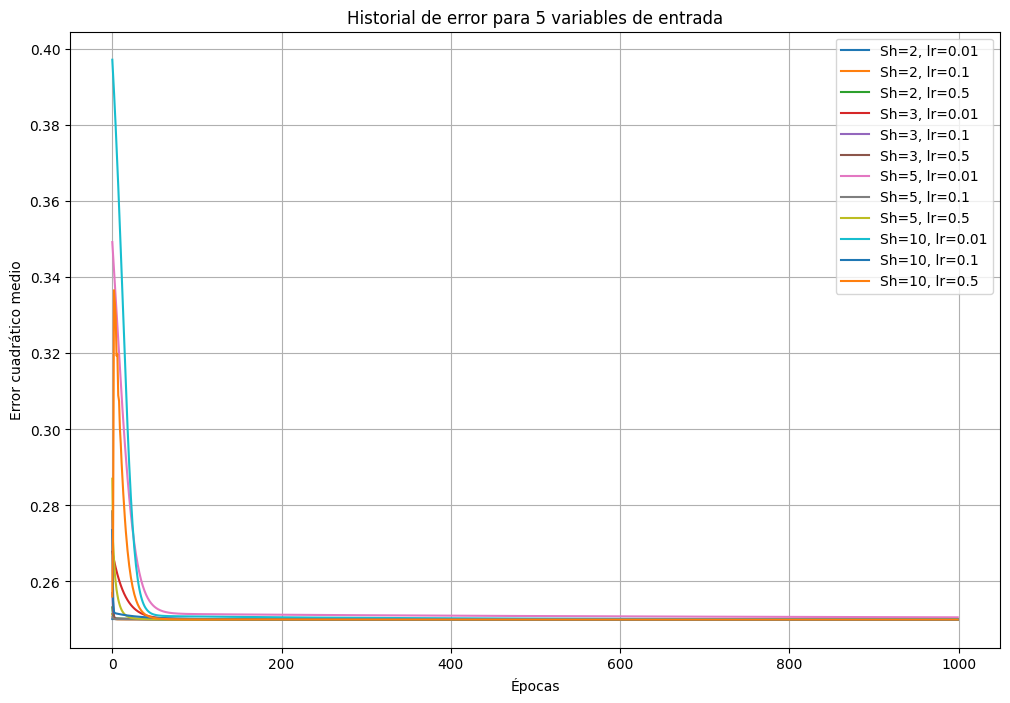

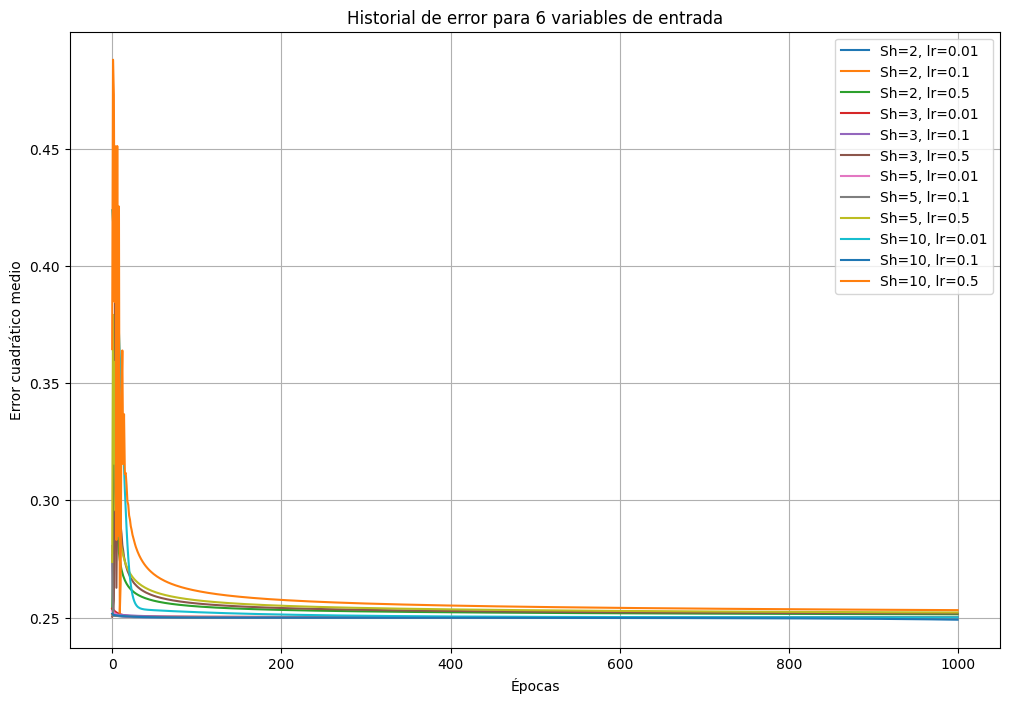

In [19]:
# Configuración de los parámetros
epochs = 1000

# Entrenando el modelo con diferentes configuraciones y graficando resultados
for n in [2, 3, 4, 5, 6]:  # Número de variables de entrada
    plt.figure(figsize=(12, 8))
    for Sh in [2, 3, 5, 10]:  # Diferentes cantidades de unidades por capa oculta
        for lr in [0.01, 0.1, 0.5]:  # Diferentes coeficientes de aprendizaje
            errors = train_parity_model(n, Sh, lr, epochs)
            plt.plot(errors, label=f'Sh={Sh}, lr={lr}')

    # Configurar y mostrar el gráfico para el número de variables de entrada `n`
    plt.title(f'Historial de error para {n} variables de entrada')
    plt.xlabel('Épocas')
    plt.ylabel('Error cuadrático medio')
    plt.legend()
    plt.grid(True)
    plt.show()

## Aproximación de funciones

Implementar un perceptrón multicapa para aproximar la función $f_{1}(x)=\frac{1}{2}\sin(\frac{2\pi}{5}x)-\frac{1}{4}\sin(\frac{2\pi}{3}x)+\frac{1}{8}\sin(a\pi x)$ en el intervalo $x\in[-2\pi,2\pi]$.

Experimentar con distintos modelos teniendo en cuenta las siguiente variantes.

- Para valores de $a=1$, $a=2$ y $a=4$.
- Tomando valores a intervalos regulares o con una distribución aleatoria uniforme.
- Con conjuntos de datos de distintos tamaños.
- Con distinta cantidad de unidades ocultas.
- Con distintos tamaños de mini-lotes.

No se pide que exploren exhaustivamente todas estas opciones, sino que las tengan en cuenta para la experimentación y que prueben cada variante al menos una vez.


Alternativamente también se sugiere experimentar con la función $f(x)=\frac{1}{2}.sin(a.cos(x)).cos(2x)+\frac{1}{4}sin(x)$ de manera similar.

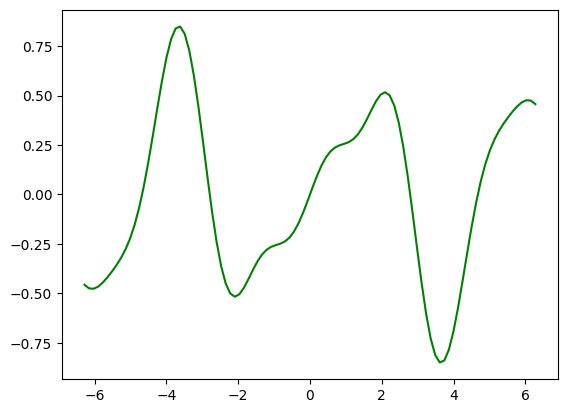

In [20]:
from numpy import pi, sin, cos

a = 1
P = 100

x = np.linspace(-2 * pi, 2 * pi, P).reshape((P, 1))
z = 0.5 * sin((2 * pi / 5) * x) - 0.25 * sin((2 * pi / 3) * x) + 0.125 * sin(a * pi * x)

plt.plot(x, z, 'g-')
plt.show()

In [21]:
# Definición de la función f(x)
def generate_function_data(a, P):
    x = np.linspace(-2 * np.pi, 2 * np.pi, P).reshape((P, 1))
    z = 0.5 * np.sin((2 * np.pi / 5) * x) - 0.25 * np.sin((2 * np.pi / 3) * x) + 0.125 * np.sin(a * np.pi * x)
    return x, z

# Función de activación tanh
def tanh(x):
    return np.tanh(x)

# Derivada de la función de activación tanh
def tanh_derivada(x):
    return 1 - np.square(np.tanh(x))

# Función de bias para agregar la unidad umbral
def bias_add(V):
    bias = np.ones((len(V), 1))
    return np.hstack([V, bias])

# Función para remover el bias en los deltas
def bias_sub(x):
    return x[:, :-1]

# Función para entrenar el MLP
def train_function_approximator(x, z, Sh, lr, epochs=10000):
    # Parámetros de la red
    Si = x.shape[1]  # Unidades en la capa de entrada
    So = 1  # Unidades en la capa de salida

    # Inicialización de pesos
    W1 = np.random.normal(0, 0.5, size=(Si + 1, Sh))
    W2 = np.random.normal(0, 0.5, size=(Sh + 1, So))

    E = []
    e = 1
    t = 0

    while (e > 0.01) and (t < epochs):
        # Forward pass
        Y0 = bias_add(x) # Agregamos bias en la capa de entrada
        Y1 = bias_add(tanh(np.dot(Y0, W1))) # Agregamos bias en la capa oculta
        Y2 = tanh(np.dot(Y1, W2))

        # Backpropagation

        # Error en capa de salida
        E2 = z - Y2
        D2 = E2 * tanh_derivada(Y2)
        dW2 = np.dot(Y1.T, D2)

        # Error en capa oculta
        E1 = np.dot(D2, W2.T)
        D1 = bias_sub(E1 * tanh_derivada(Y1))
        dW1 = np.dot(Y0.T, D1)

        # Actualización de pesos
        W1 += lr * dW1
        W2 += lr * dW2

        # Calcular error medio cuadrático
        e = np.mean(np.square(E2))
        E.append(e)  # Guardar historial de error

        t += 1

    return W1, W2, E

# Función para predecir usando el MLP entrenado
def predict_function(x, W1, W2):
    Y0 = bias_add(x)
    Y1 = bias_add(tanh(np.dot(Y0, W1)))
    Y2 = tanh(np.dot(Y1, W2))
    return Y2



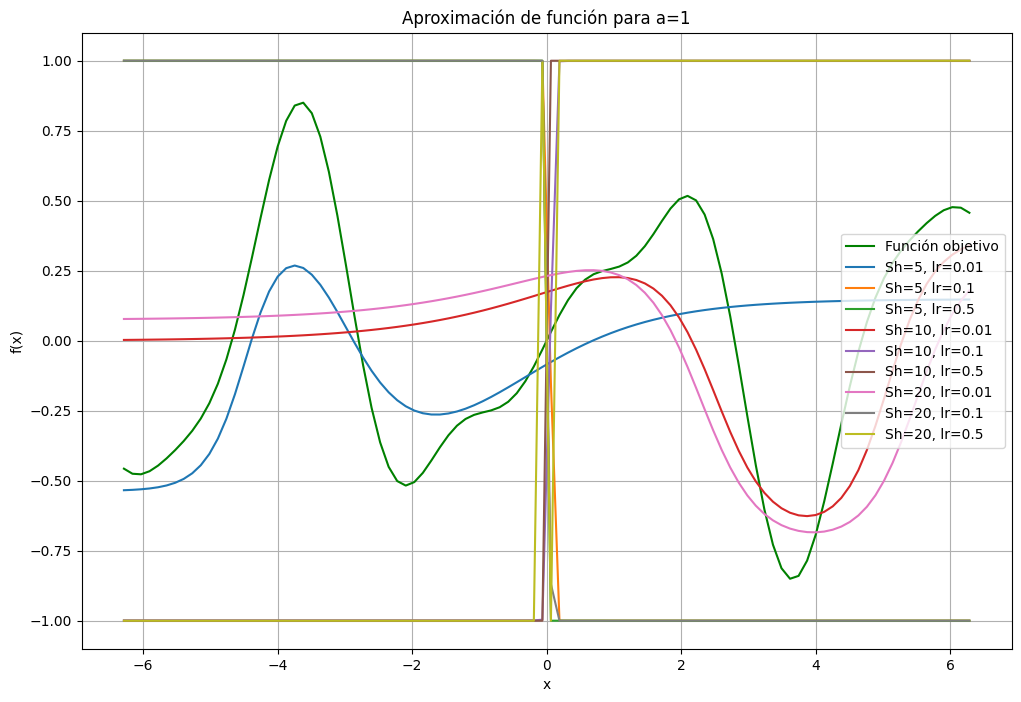

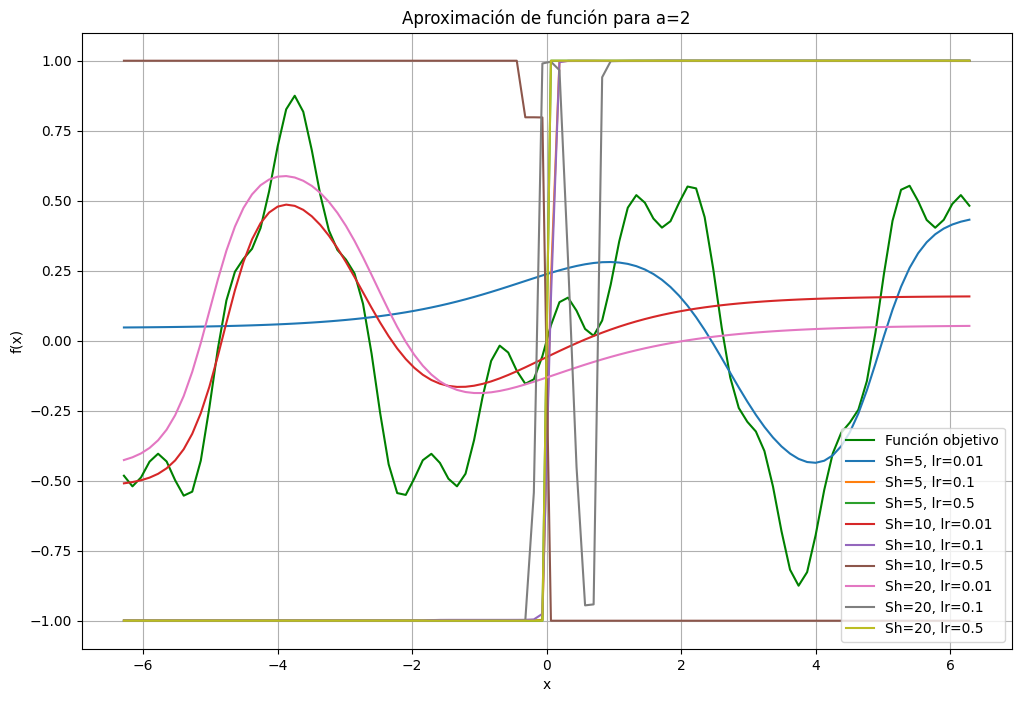

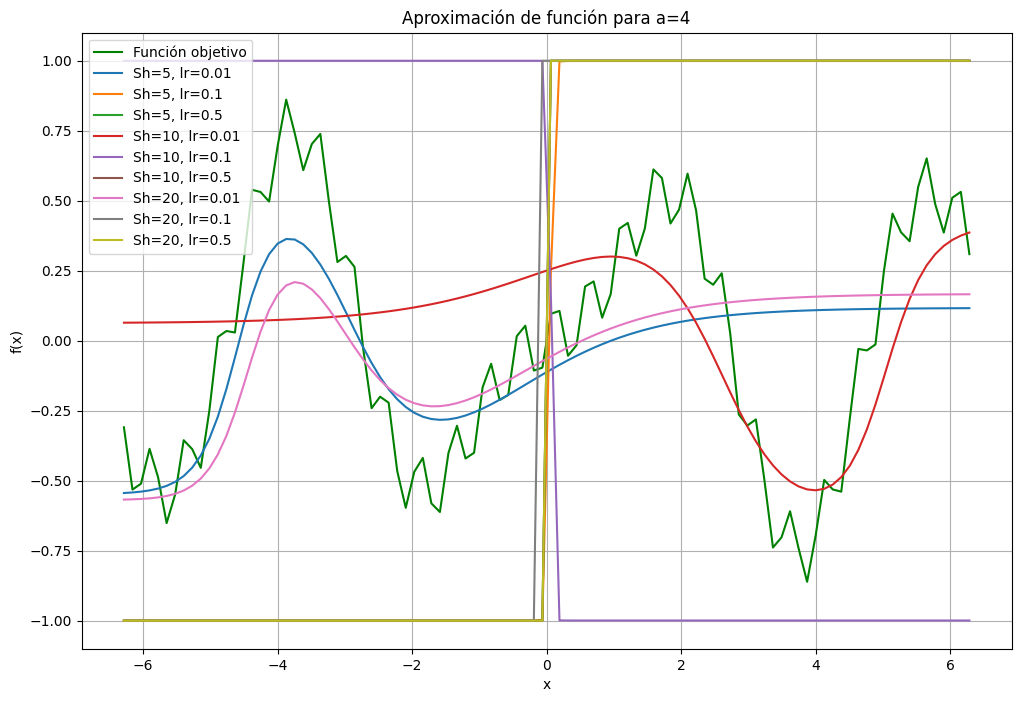

In [22]:
# Parámetros para la experimentación
a_values = [1, 2, 4]
Sh_values = [5, 10, 20]
lr_values = [0.01, 0.1, 0.5]
P = 100
epochs = 5000

# Realizando experimentos
for a in a_values:
    x, z = generate_function_data(a, P)
    plt.figure(figsize=(12, 8))
    plt.plot(x, z, 'g-', label='Función objetivo')

    for Sh in Sh_values:
        for lr in lr_values:
            W1, W2, errors = train_function_approximator(x, z, Sh, lr, epochs)
            z_pred = predict_function(x, W1, W2)
            plt.plot(x, z_pred, label=f'Sh={Sh}, lr={lr}')

    plt.title(f'Aproximación de función para a={a}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()